# OpenCV Library


Estimated time needed: **60** minutes


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing and transmitting, and gathering images through the internet. 
Python is an excellent choice as it has many image processing tools, computer vision, and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and the internet.
A digital image is simply a file on your computer. In this lab, you will gain an understanding  of these files and learn to work with these files with some popular libraries


<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the image for the lab:


First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [ ]:
from tkinter import Image
def get_concat_h(im1, im2):# Định nghĩa một hàm tên là get_concat_h nhận hai đối tượng ảnh im1 và im2 làm đầu vào
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))# Tạo một ảnh đích (dst) hoàn toàn mới, trống rỗng, có chế độ màu 'RGB' và chiều rộng bằng tổng chiều rộng của hai ảnh đầu vào.
    dst.paste(im1, (0, 0))# Dán ảnh thứ nhất (im1) vào góc trên cùng bên trái của ảnh đích (dst).
    dst.paste(im2, (im1.width, 0))# Dán ảnh thứ hai (im2) ngay bên phải ảnh thứ nhất, bắt đầu từ tọa độ x = chiều rộng của im1.
    return dst# Trả về đối tượng ảnh đích (dst) đã được nối ngang hoàn chỉnh.


## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [2]:
my_image = "lenna.png"

Filename consists of two parts, the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the image. There are two popular image formats -- Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image using sine/cosine approximations, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [ ]:
import os# Nhập khẩu mô-đun os (Operating System) vào chương trình Python, cho phép tương tác với hệ điều hành và đường dẫn file.
cwd = os.getcwd()# Gọi hàm getcwd() để lấy đường dẫn thư mục làm việc hiện tại (Current Working Directory) và gán nó cho biến cwd.
cwd # Hiển thị giá trị của biến cwd, tức là đường dẫn thư mục hiện tại dưới dạng một chuỗi ký tự (string)

'd:\\Thị giác máy tính'

The "path" to an image can be found using the following line of code.


In [4]:
#image_path = os.path.join(cwd, my_image)
image_path = "d:\Quan_VLU2025\GIẢNG DẠY\242_Thị giác máy tính\lenna.png".encode('utf-8').decode()
image_path

<>:2: SyntaxWarning: invalid escape sequence '\Q'
<>:2: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\X270\AppData\Local\Temp\ipykernel_17080\269769842.py:2: SyntaxWarning: invalid escape sequence '\Q'
  image_path = "d:\Quan_VLU2025\GIẢNG DẠY\242_Thị giác máy tính\lenna.png".encode('utf-8').decode()


'd:\\Quan_VLU2025\\GIẢNG DẠY¢_Thị giác máy tính\\lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [5]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [6]:
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers. 


In [7]:
type(image)

NoneType

We can get the shape of the array from the `shape` attribute.


In [ ]:
image.shape


AttributeError: 'NoneType' object has no attribute 'shape'

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [ ]:
image.max()


<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'shape'

and


In [ ]:
image.min()

np.uint8(3)

##  Plotting an Image 


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [19]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [ ]:
import matplotlib.pyplot as plt

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [ ]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# Sử dụng thư viện OpenCV (cv2) để chuyển đổi không gian màu của image từ định dạng BGR (mặc định của OpenCV) sang định dạng RGB 

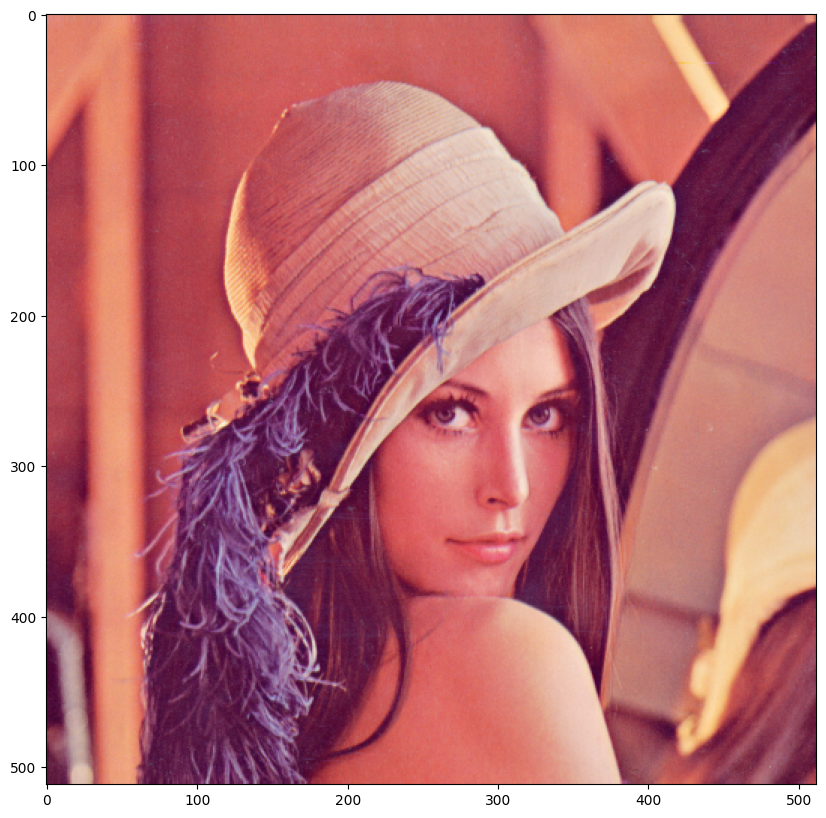

In [ ]:
plt.figure(figsize=(10,10))# Tạo một khung vẽ (figure) mới trong thư viện Matplotlib với kích thước 10x10 inch.
plt.imshow(new_image)# Hiển thị mảng hình ảnh new_image (đã được chuyển sang định dạng RGB chính xác bằng OpenCV) trên khung vẽ hiện tại.
plt.show()

You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [ ]:
image = cv2.imread(image_path)# Sử dụng hàm imread() của OpenCV để đọc một tệp hình ảnh từ đường dẫn image_path và lưu dữ liệu hình ảnh (dưới dạng mảng NumPy BGR) vào biến image.
image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

You can save the image as in `jpg` format.


In [ ]:
cv2.imwrite("lenna.jpg", image)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:1146: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# Sử dụng hàm cvtColor() của OpenCV để chuyển đổi ảnh màu image (ở định dạng BGR mặc định) sang ảnh thang độ xám (grayscale) và lưu kết quả vào biến image_gray

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


The image array has only two dimensions, i.e. only one color channel:


In [ ]:
image_gray.shape

We can plot the image using `imshow` but we have to specify the color map is gray:


In [ ]:
plt.figure(figsize=(10, 10))# Tạo một khung vẽ (figure) mới trong Matplotlib với kích thước 10x10 inch.
plt.imshow(image_gray, cmap='gray')
plt.show()

NameError: name 'image_gray' is not defined

<Figure size 1000x1000 with 0 Axes>

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [ ]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [ ]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im_gray,cmap='gray')
plt.show()

### Color Channels  


We can also work with the different color channels. Consider the following image:


In [ ]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [ ]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [ ]:
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


In [ ]:
plt.figure(figsize=(10,10))# Tạo một khung vẽ (figure) lớn trong Matplotlib với kích thước 10x10 inch để chứa nhiều biểu đồ con
plt.subplot(121)# Tạo một vùng con thứ nhất trong lưới 1 hàng, 2 cột (vị trí bên trái).
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))# Chuyển đổi ảnh baboon từ BGR sang RGB và hiển thị nó ở vùng con bên trái.
plt.title("RGB image")# Đặt tiêu đề "RGB image" cho vùng con bên trái
plt.subplot(122)# Tạo một vùng con thứ hai trong lưới 1 hàng, 2 cột (vị trí bên phải)
plt.imshow(im_bgr,cmap='gray')# Hiển thị hình ảnh im_bgr (một ảnh xám hoặc kênh màu) ở vùng con bên phải, sử dụng cmap='gray' để hiển thị đúng màu xám.
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")# Đặt tiêu đề mô tả các kênh màu cho vùng con bên phải.
plt.show()

### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [ ]:
rows = 256

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[0:rows,:,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image:


In [ ]:
columns = 256

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[:,0:columns,:])
plt.show()

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


In [ ]:
A = new_image.copy()
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


In [ ]:
B = A
A[:,:,:] = 0
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


In [ ]:
baboon_red = baboon.copy()# Tạo một bản sao độc lập của mảng ảnh gốc baboon để giữ an toàn dữ liệu gốc.
baboon_red[:, :, 0] = 0# Đặt tất cả giá trị pixel ở kênh màu xanh lam (kênh index 0, trong BGR của OpenCV) thành 0
baboon_red[:, :, 1] = 0# Đặt tất cả giá trị pixel ở kênh màu xanh lục (kênh index 1, trong BGR của OpenCV) thành 0
plt.figure(figsize=(10, 10)) # Tạo một khung vẽ mới trong Matplotlib với kích thước 10x10 inch.
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB)) # Chuyển đổi mảng ảnh baboon_red (lúc này chỉ còn kênh Đỏ) từ BGR sang RGB để hiển thị màu sắc chính xác, sau đó hiển thị nó.
plt.show()

We can do the same for blue:  


In [ ]:
baboon_blue = baboon.copy() 
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()
# Tương tự ở trên với Xanh lam

We can do the same for green:


In [ ]:
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()
#Tương tự ở trên với xanh lá 

In [ ]:
image=cv2.imread('baboon.png')

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image=cv2.imread('baboon.png') # replace and add you image here name 
baboon_blue=image.copy()
baboon_blue[:,:,1] = 0
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

### Question 1: 
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a OpenCV Image object called `baboon_blue`, convert the image from BGR format to RGB format, get the blue channel out of it, and finally plot the image


In [21]:
baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Double-click **here** for a hint.

<!-- The hint is below:

baboon_blue[:,:,2] = 0

-->


Double-click **here** for the solution.

<!-- The answer is below:

baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

-->


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


** SO SÁNH THƯ VIỆN PIL VÀ CV**

So sánh thư viện xử lý ảnh Pillow (PIL Fork) và OpenCV (CV2):
1. Mục đích và Ứng dụng chính:
Pillow (PIL): Tập trung vào các thao tác xử lý ảnh cơ bản, chỉnh sửa ảnh chất lượng cao (thay đổi kích thước, cắt xén, áp dụng bộ lọc đơn giản), và quản lý các định dạng tệp ảnh. Nó thường được dùng trong các ứng dụng web hoặc tác vụ chuẩn bị dữ liệu ảnh thông thường.
OpenCV (CV2): Tập trung mạnh mẽ vào thị giác máy tính (Computer Vision), phân tích hình ảnh, machine learning và xử lý video thời gian thực. Nó được thiết kế cho các thuật toán phức tạp như nhận diện khuôn mặt, theo dõi đối tượng, và hiệu suất cao.
2. Định dạng màu sắc mặc định:
Pillow (PIL): Sử dụng thứ tự kênh màu chuẩn quốc tế là RGB (Red, Green, Blue).
OpenCV (CV2): Sử dụng thứ tự kênh màu là BGR (Blue, Green, Red). Đây là điểm khác biệt quan trọng nhất, bạn cần chuyển đổi định dạng khi làm việc song song với hai thư viện hoặc khi hiển thị ảnh bằng Matplotlib.
3. Cấu trúc dữ liệu hình ảnh:
Pillow (PIL): Lưu trữ hình ảnh dưới dạng đối tượng Image riêng của thư viện. Để tính toán bằng NumPy, bạn cần chuyển đổi nó bằng np.array(image).
OpenCV (CV2): Tự động coi hình ảnh là một mảng NumPy (ndarray). Điều này giúp việc tích hợp các phép toán toán học trở nên liền mạch và hiệu quả hơn.
4. Hiệu suất và Tốc độ:
Pillow (PIL): Tốc độ tốt cho các tác vụ đơn giản.
OpenCV (CV2): Cực kỳ nhanh, vì phần lõi được viết bằng C/C++ và tối ưu hóa cho các thuật toán tính toán nặng.
5. Khả năng hiển thị:
Pillow (PIL): Cung cấp hàm .show() đơn giản để mở ảnh trong trình xem mặc định của hệ thống.
OpenCV (CV2): Cung cấp cv2.imshow(), nhưng thường được dùng kết hợp với Matplotlib (plt.imshow()) để hiển thị hình ảnh trong môi trường phát triển (ví dụ: Jupyter Notebook, Google Colab).

<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->
